### Afshan Anam Saeed 21-741-954

# Assignment 6- Network Science
## Inference of Networks

In [1]:
import networkx as nx                           #for network analysis
import numpy as np                              #for mathematical analysis
import matplotlib.pyplot as plt                 #for visualization
import os
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
import os
import warnings
warnings.filterwarnings('ignore')

##### A06.1 - Exponential Random Graph Models


solution error = 6.380986405929434e-09

solution error = 1.656161430219072e-09

solution error = 7.49648165765393e-09

solution error = 2.747285066106997e-09

solution error = 3.8556038362003164e-09

solution error = 2.206274274385578e-09

solution error = 1.2499299373303074e-09

solution error = 4.357122662668189e-09

solution error = 4.538463826975203e-09

solution error = 1.4417800286992133e-09

solution error = 1.3808119092573179e-09

solution error = 1.8763159914669814e-09

solution error = 1.2585985587065807e-09

solution error = 2.5568738237780053e-09

solution error = 1.8173977878177539e-09

solution error = 3.317552454973338e-09

solution error = 1.5293437627406092e-09

solution error = 4.652051188713813e-09

solution error = 5.740247388530406e-09

solution error = 4.518845742040867e-09

solution error = 2.917317942774389e-09

solution error = 2.265110765620193e-09


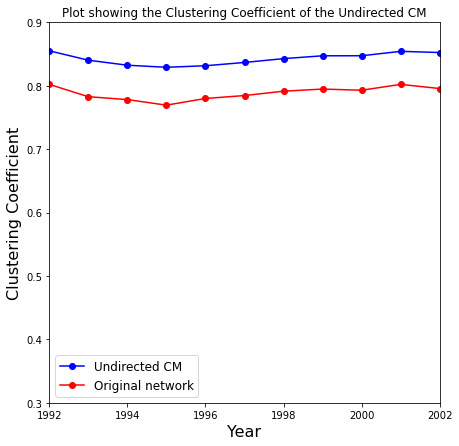

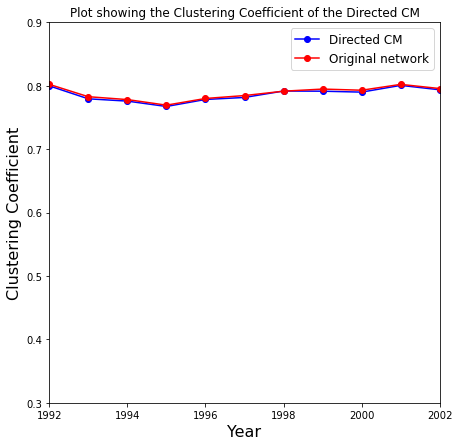

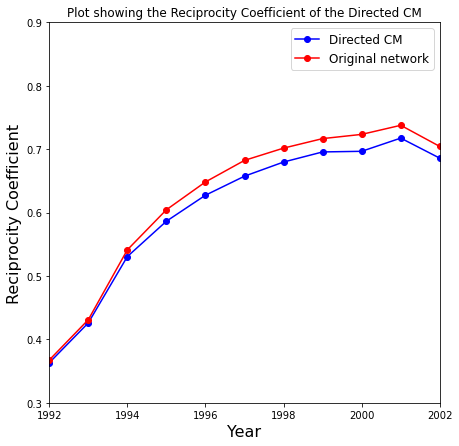

In [2]:
filelist = os.listdir("C:\\Users\\Aqdus\\Downloads\\data\\data")

clust_dir_list=[]
clust_undir_list=[]
reciprocity=[]
years=list(range(1992,2003))
clust_ori_list=[]
reci_ori_list=[]

for file in sorted(filelist):
    
    name_of_network = nx.read_graphml(os.path.join("C:\\Users\\Aqdus\\Downloads\\data\\data\\", file))
 
    adj_kar_undir=nx.to_numpy_array(name_of_network.to_undirected())    #convert to numpy adjacency matrix
    graph_undir=UndirectedGraph(adj_kar_undir)                          #initializing the NEMtropy Undirected Graph Object
    graph_undir.solve_tool(model="cm_exp")                              #solving the maximum likelihood problem for the model of our choice
    graph_undir.ensemble_sampler(10, cpu_n=1, output_dir="C:\\Users\\Aqdus\\Desktop\\Assignments\\Network Science\\Sample\\Undirected\\")     #sampling networks from ERGM
    
    adj_kar_dir=nx.to_numpy_array(name_of_network)                      #convert to numpy adjacency matrix
    graph_dir=DirectedGraph(adj_kar_dir)                                #initializing the NEMtropy Directed Graph Object
    graph_dir.solve_tool(model="dcm_exp")                               #solving the maximum likelihood problem for the model of our choice
    graph_dir.ensemble_sampler(10, cpu_n=1, output_dir="C:\\Users\\Aqdus\\Desktop\\Assignments\\Network Science\\Sample\\Directed\\")       #sampling networks from ERGM
    
    clust_dir = []
    clust_undir=[]
    recipro=[] 
    
    for i in range(10):
        edgelist_ens = np.loadtxt(f"C:\\Users\\Aqdus\\Desktop\\Assignments\\Network Science\\Sample\\Undirected\\{i}.txt")
        net = nx.Graph()
        net.add_edges_from(edgelist_ens)
        clust_undir.append(nx.average_clustering(net))
    
    for i in range(10):
        edgelist_ens = np.loadtxt(f"C:\\Users\\Aqdus\\Desktop\\Assignments\\Network Science\\Sample\\Directed\\{i}.txt")
        net = nx.DiGraph()
        net.add_edges_from(edgelist_ens)
        clust_dir.append(nx.average_clustering(net))
        recipro.append(nx.reciprocity(net))
    
    
    clust_dir_list.append(np.mean(np.array(clust_dir)))
    clust_undir_list.append(np.mean(np.array(clust_undir)))
    reciprocity.append(np.mean(np.array(recipro)))
    clust_ori_list.append(nx.average_clustering(name_of_network))
    reci_ori_list.append(nx.reciprocity(name_of_network))
    
# lists for generating plots
coeff_orig_list = [clust_ori_list, clust_ori_list, reci_ori_list]
coeff_list = [clust_undir_list, clust_dir_list, reciprocity]
label_list = ['Undirected CM', 'Directed CM', 'Directed CM']
yLabel_list = ['Clustering Coefficient', 'Clustering Coefficient', 'Reciprocity Coefficient']

# plot graphs
for i in range(len(coeff_orig_list)):
    plt.figure(figsize = (7,7))
    plt.plot(years, coeff_list[i], '-ok', label = label_list[i], color = 'blue')
    plt.plot(years, coeff_orig_list[i], '-ok', label = 'Original network', color = 'red')
    plt.xlim(years[0], years[-1])
    plt.ylim(0.3,0.9)
    plt.xlabel('Year', fontsize = 16)
    plt.ylabel(yLabel_list[i], fontsize = 16)
    plt.title("Plot showing the "+yLabel_list[i]+" of the "+label_list[i])
    plt.legend(fontsize = 12)
    plt.show()
    print('\n\n')

In the first part, we have plotted the graphs for the Clustering Coefficients of unweighted directed and undirected graphs. A comparison is done between the values obtained with the sampled networks and the original network. As observed, these values do not significantly differ in the two cases. The undirected clustering coefficients show little observable change while the directed ones do not show any change at all. 
Physically, the clustering seems to be almost constant as a function of time displaying that the countries were connected amongst them selves throughout the 10 year period. However, when we plot the reciprocity of the directed graph as a function of time, we notice a different trend. Although the clustering coefficients displayed that most countries are clustered, they may not be bidirectionally connected. For the years preceeding 1995, most countries only had a one way trade. However, what is assumed to be globalization, increased the bidirectional transactions and thus it shows increasing reciprocity over the years. 



#### A06.2 - Weighted ERGMs

In [ ]:
assor_inout_dir_list=[]
assor_inin_dir_list=[]
assor_outout_dir_list=[]
assor_undir_list=[]
years=list(range(1992,2003))
assor_ori_list_undir=[]
assor_ori_list_dir_inout=[]
assor_ori_list_dir_inin=[]
assor_ori_list_dir_outout=[]

for file in sorted(filelist):
    
    name_of_network = nx.read_graphml(os.path.join("C:\\Users\\Aqdus\\Downloads\\data\\data\\", file))
    
    assor_ori_list_undir.append(nx.degree_pearson_correlation_coefficient(name_of_network,weight='weight'))
    assor_ori_list_dir_inout.append(nx.degree_pearson_correlation_coefficient(name_of_network, x='in', y='out', weight='weight'))
    assor_ori_list_dir_inin.append(nx.degree_pearson_correlation_coefficient(name_of_network, x='in', y='in', weight='weight'))
    assor_ori_list_dir_outout.append(nx.degree_pearson_correlation_coefficient(name_of_network, x='out', y='out', weight='weight'))
 
    adj_kar_undir=nx.to_numpy_array(name_of_network.to_undirected())    #convert to numpy adjacency matrix
    graph_undir=UndirectedGraph(adj_kar_undir)                          #initializing the NEMtropy Undirected Graph Object
    graph_undir.solve_tool(model="crema",
                           method="newton",
                           initial_guess="random",
                           adjacency="cm_exp",
                           method_adjacency="newton",max_steps = 2000)  #solving the maximum likelihood problem for the model of our choice
    graph_undir.ensemble_sampler(10, cpu_n=1, output_dir="C:\\Users\\Aqdus\\Desktop\\Assignments\\Network Science\\Sample\\Undirected\\")     #sampling networks from ERGM
    
    
    adj_kar_dir=nx.to_numpy_array(name_of_network)                       #convert to numpy adjacency matrix
    graph_dir=DirectedGraph(adj_kar_dir)                                 #initializing the NEMtropy Directed Graph Object
    graph_dir.solve_tool(model="crema",
                         method="newton",
                         initial_guess="random",
                         adjacency="dcm_exp",
                         method_adjacency="newton",max_steps = 2000)     #solving the maximum likelihood problem for the model of our choice
    graph_dir.ensemble_sampler(10, cpu_n=1, output_dir="C:\\Users\\Aqdus\\Desktop\\Assignments\\Network Science\\Sample\\Directed\\")       #sampling networks from ERGM
    
    assor_InOut_dir = []
    assor_InIn_dir = []
    assor_OutOut_dir = []
    assor_undir=[]
    
    for i in range(10):
        edgelist_ens = np.loadtxt(f"C:\\Users\\Aqdus\\Desktop\\Assignments\\Network Science\\Sample\\Undirected\\{i}.txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                        is_directed = False,
                                        is_sparse = False,
                                        is_weighted = True)
        G_Undir = nx.from_numpy_array(ens_adj)                             # and generate a networkx graph from it
        assor_undir.append(nx.degree_pearson_correlation_coefficient(G_Undir,weight='weight'))
        
    for i in range(10):
        edgelist_ens = np.loadtxt(f"C:\\Users\\Aqdus\\Desktop\\Assignments\\Network Science\\Sample\\Directed\\{i}.txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                        is_directed = True,
                                        is_sparse = False,
                                        is_weighted = True)
        G_Dir = nx.from_numpy_array(ens_adj,create_using=nx.DiGraph)        # and generate a networkx graph from it
        assor_InOut_dir.append(nx.degree_pearson_correlation_coefficient(G_Dir, x='in', y='out', weight='weight')) 
        assor_InIn_dir.append(nx.degree_pearson_correlation_coefficient(G_Dir, x='in', y='in', weight='weight'))
        assor_OutOut_dir.append(nx.degree_pearson_correlation_coefficient(G_Dir, x='out', y='out', weight='weight'))
    
    assor_inout_dir_list.append(np.mean(np.array(assor_InOut_dir)))
    assor_inin_dir_list.append(np.mean(np.array(assor_InIn_dir)))
    assor_outout_dir_list.append(np.mean(np.array(assor_OutOut_dir)))
    assor_undir_list.append(np.mean(np.array(assor_undir)))
    assor_ori_list.append(nx.degree_pearson_correlation_coefficient(name_of_network,weight='weight'))
    
# lists for generating plots
assor_list = [assor_undir_list,assor_inout_dir_list, assor_inin_dir_list,assor_outout_dir_list]
assor_ori_list = [assor_ori_list_undir,assor_ori_list_dir_inout, assor_ori_list_dir_inin,assor_ori_list_dir_outout]
label_list = ['Undirected CM', 'Directed CM', 'Directed CM','Directed CM']
yLabel_list = ['Strength Assortativity', 'Strength Assortativity In-Out', 'Strength Assortativity In-In','Strength Assortativity Out-Out']

# plot graphs
for i in range(len(assor_list)):
    plt.figure(figsize = (7,7))
    plt.plot(years, assor_list[i], '-ok', label = label_list[i]+"Samples", color = 'blue')
    plt.plot(years, assor_ori_list[i], '-ok', label = 'Original network', color = 'red')
    plt.xlim(years[0], years[-1])
    plt.ylim(-0.2,0.1)
    plt.xlabel('Year', fontsize = 16)
    plt.ylabel(yLabel_list[i], fontsize = 16)
    plt.title("Plot showing the "+yLabel_list[i]+" of the "+label_list[i])
    plt.legend(fontsize = 12)
    plt.show()
    print('\n\n')

### Conclusions